In [3]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
#HAVE STUFF THAT NEEDS TO BE DONE BEFORE FINAL

###Linear Regression

1) Load the linear data using `np.loadtxt`. The first column is `x` and the second column is `y`.

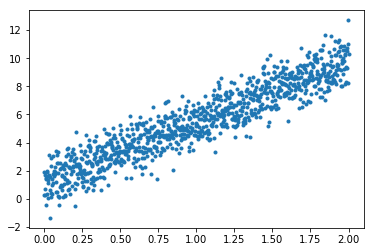

In [4]:
data_x,data_y = np.loadtxt('linear.txt')
plt.plot(data_x,data_y, '.')

2) Plot `data_x` vs `data_y`

In [5]:
A = np.array(
    [
    [3.,2,1],
    [1,-1,1],
    [1,10,-20]
    ]
)
B = np.array([10.,-4,-39])
print(A,B)
np.linalg.solve(A,B)

(array([[  3.,   2.,   1.],
       [  1.,  -1.,   1.],
       [  1.,  10., -20.]]), array([ 10.,  -4., -39.]))


array([-2.61445783,  6.40963855,  5.02409639])

In [6]:
def forward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow,ncol = A.shape
    for pivot_row in range(nrow-1):
        for elim_row in range(pivot_row +1, nrow):
            if (pivot_row != elim_row and pivot_row < elim_row):
                c = A[elim_row,pivot_row]/float(A[pivot_row,pivot_row])
                A[elim_row] -= c*A[pivot_row]
                B[elim_row] -= c*B[pivot_row]
    return A,B
A,N = forward(A,B)

def backward(A,B):
    newA = A.copy()
    newB = B.copy()
    nrow,ncol = A.shape
    for pivot_row in range(nrow):
        for elim_row in range(nrow):
            if (pivot_row != elim_row and elim_row < pivot_row):
                c = A[elim_row,pivot_row]/float(A[pivot_row,pivot_row])
                A[elim_row] -= c*A[pivot_row]
                B[elim_row] -= c*B[pivot_row]
    return A,B
NA,NB = backward(A,B)
print NA,NB
x = NA[0][0]/NB[0]
y = NA[1][1]/NB[1]
z = NA[2][2]/NB[2]
print x,y,z

[[  3.           0.           0.        ]
 [  0.          -1.66666667   0.        ]
 [  0.           0.         -16.6       ]] [ -7.84337349 -10.68273092 -83.4       ]
-0.382488479263 0.156015037594 0.199040767386


3) What what is the equation for a striaght line?

In [7]:
#y = mx + c

4) What is the difference between a "good line" and a "bad line"?

In [8]:
#a good line will follow the points , line of best fit

5) What are we trying to adjust to minimize the $\chi^2$?

In [9]:
#m and c

6) How do we findind the minimum of $\chi^2$? Whare are they?

In [10]:
#we calculate point wise and add them up...ohoh and we have to square the points
#if x^2 is small there are many points close to the line
#if x^2 is large, many points are far away from the line


7) Find the best slope and the best intercept.

In [11]:
Zx =0
Zx2 = 0
Zy = 0
Zyx = 0
for i,j in zip(data_x,data_y):
    Zx += i
    Zx2 += i**2
    Zy += j
    Zyx += j*i

A = np.array([[Zx2,Zx],[Zx,len(data_x)]])
B = np.array([Zyx,Zy])

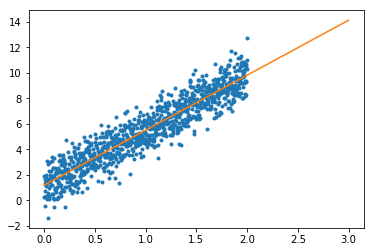

In [12]:
a,b = np.linalg.solve(A,B)

plt.plot(data_x,data_y, '.')
def f(x):
    return a*x + b
xs = np.linspace(0,3,1000)
ys = [f(x) for x in xs]
plt.plot(xs,ys)

8) Plot the line along with the data point to verify that you actually got the right answer.

9) What is your prediction for the value of `y` when `x`=3.0?

In [13]:
print ys[999]

14.1199722834


###Generalization

The technique we learn above of finding the parameter that minimize the $\chi^2$ does not limit you to just a straight line model. Let us use it for a more general problem.

1) Open parabola.txt and plot it. Again the first column is `x` and second column is `y`.

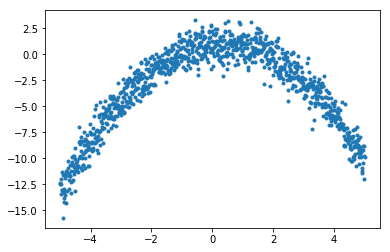

In [14]:
data_x,data_y = np.loadtxt('parabola.txt')
plt.plot(data_x,data_y, '.')

2) What is the general form for parabola?

In [15]:
#y = a*x**2 + b*x + c


3) What is the difference between a "good line" and a "bad line"?

In [16]:
#a good line will fit the points, the distance in minizmied between the line and the points

4) What are we trying to minimize in order to find the best parabola?

In [17]:
#a,b,c

5) Find the best fitted parabola and plot to verify.

-0.504935161845 0.305858733641 0.976680555745


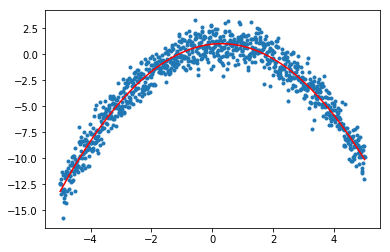

In [18]:
x1 = [sum(data_x**4), sum(data_x**3),sum(data_x**2)]
x2 = [sum(data_x**3), sum(data_x**2),sum(data_x)]
x3 = [sum(data_x**2), sum(data_x),len(data_x)]
A = np.array([x1,x2,x3])
B = np.array([ sum([x**2*y for x,y in zip(data_x,data_y)]),sum([x*y for x,y in zip(data_x,data_y)]),sum(data_y)])


a,b,c  = np.linalg.solve(A,B)
print a,b,c

def f(x):
    return a*x**2 + b*x + c

plt.plot(data_x,data_y, '.')
plt.plot(data_x,[f(i) for i in data_x],color = "red")



###Extra

Find something interesting from http://www.stat.ufl.edu/~winner/datasets.html and make some prediction.